# Import Dataset & Libraries

In [2]:
import numpy as np
import torch
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

trainset = datasets.MNIST('', download=True, train=True, transform=transforms.ToTensor())
testset = datasets.MNIST('', download=True, train=False, transform=transforms.ToTensor())

# Visualize A Sample Image and Its Label

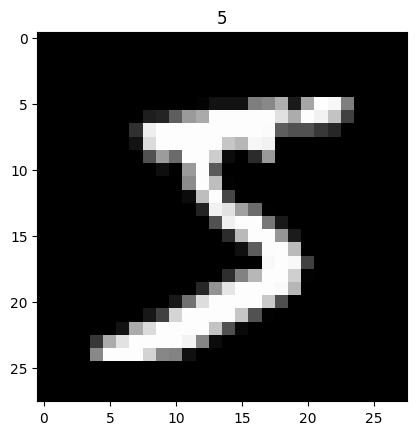

In [2]:
plt.imshow(trainset.data[0], cmap='gray')
plt.title('%i' % trainset.targets[0])
plt.show()

# DataLoaders and Batch Size

In [3]:
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

# Fully Connected Neural Network

In [3]:
import torch.nn as nn

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super(NeuralNet, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size_1)
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)
        self.fc3 = nn.Linear(hidden_size_2, output_size)

        self.relu = nn.ReLU()
        self.LogSoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.LogSoftmax(self.fc3(x))
        return x

In [4]:
input_size = 28*28 # number of image pixels
hidden_size_1 = 128 # hidden layer 1
hidden_size_2 = 64 # hidden layer 2
output_size = 10 # number of classes

In [5]:
model = NeuralNet(input_size, hidden_size_1, hidden_size_2, output_size)
print(model)

NeuralNet(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (LogSoftmax): LogSoftmax(dim=1)
)


# Model Training

In [8]:
from torch import optim

lossFunction = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)

In [9]:
num_epochs = 10
for epoch in range(num_epochs):
    loss_ = 0
    for images, labels in train_loader:
        images = images.reshape(-1, 784)

        # Forward Pass
        output = model(images)
        loss = lossFunction(output, labels)

        # Backpropogation
        optimizer.zero_grad()
        loss.backward()

        # Update parameters
        optimizer.step()

        loss_ += loss.item()
    print("Epoch{}, Training loss:{}".format(epoch, loss_ / len(train_loader)))

Epoch0, Training loss:0.959662299785914
Epoch1, Training loss:0.32406732748979444
Epoch2, Training loss:0.26266614295669327
Epoch3, Training loss:0.22084953565237872
Epoch4, Training loss:0.1890675194664741
Epoch5, Training loss:0.1638338439591499
Epoch6, Training loss:0.14438692747410745
Epoch7, Training loss:0.12717808431971556
Epoch8, Training loss:0.11531644698573963
Epoch9, Training loss:0.10401354133308346


# Model Testing

In [10]:
with torch.no_grad():
    correct = 0
    total = 0
    all_labels = []
    all_predicted = []
    for images, labels in test_loader:
        images = images.reshape(-1, 784)
        out = model(images)
        _, predicted = torch.max(out, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.append(labels.numpy())
        all_predicted.append(predicted.numpy())
    print('Testing accuracy: {} %'.format(100 * correct / total))

Testing accuracy: 96.8 %


In [11]:
# concatenate all predictions and labels in a single array each
all_predicted_np = np.concatenate(all_predicted, axis=0)
all_labels_np = np.concatenate(all_labels, axis=0)

# Confusion Matrix

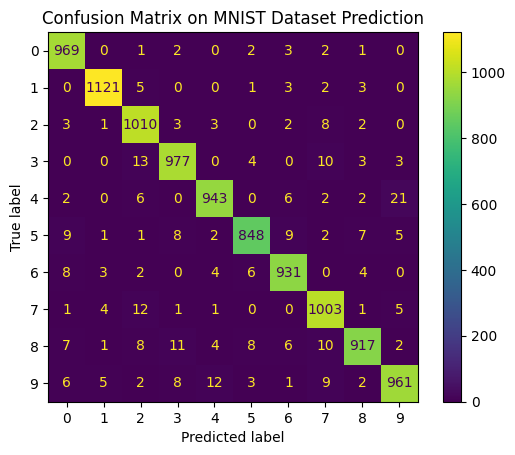

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(all_labels_np, all_predicted_np)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = None)
cm_display.plot()
plt.title('Confusion Matrix on MNIST Dataset Prediction')
plt.show()